# Recommender Systems

**1. The Cold Start Problem and Solutions**

The cold start problem occurs in recommender systems when the system lacks sufficient data to make accurate recommendations for new users (user cold start) or new items (item cold start). This can significantly impact the user experience.

Here are some approaches to tackle the cold start problem:

- Content-based filtering: Utilize item features (e.g., genre for movies, category for products) to recommend similar items to new users.
- Collaborative filtering with side information: Leverage additional user or item data (e.g., demographics, genre tags) to find similar users or items even with limited interaction history.
- Hybrid approaches: Combine content-based and collaborative filtering to benefit from both sides.
- Explicit user feedback: Encourage users to provide initial ratings or preferences during registration or through surveys to jump-start their profile.
- Implicit feedback: Analyze user actions (e.g., clicks, time spent) to infer preferences and make recommendations.

**2. Challenges in Collaborative Filtering**

Collaborative filtering, while powerful, faces some challenges:

- Cold start problem: As discussed above, lack of data for new users or items hinders accurate recommendations.
- Data sparsity: User-item interaction matrices can be very sparse, with many missing entries, affecting the accuracy of collaborative filtering algorithms.
- Scalability: Recommending to a large user base with a vast item catalog can be computationally expensive.
- Shilling attacks: Malicious users might try to manipulate recommendations by inflating ratings for specific items.

**3. SVD (Singular Value Decomposition) Algorithm**

SVD is a dimensionality reduction technique used in recommender systems to address data sparsity. Here's a breakdown:

Matrix Decomposition: It decomposes the user-item interaction matrix (typically sparse) into three matrices:
- A user latent factor matrix (represents user preferences)
- A diagonal matrix of singular values (captures the importance of latent factors)
- An item latent factor matrix (represents item characteristics)
- Reduced Dimensionality: By capturing the most significant relationships between users and items in fewer factors, SVD helps overcome sparsity issues.
- Recommendation Generation: The decomposed matrices are used to predict missing ratings or recommend items to new users based on their latent factors and the item characteristics.

**4. Advantages and Disadvantages of SVD**

Advantages:

- Reduced data sparsity: Handles missing entries in the user-item interaction matrix effectively.
- Interpretability: The latent factors can provide insights into user preferences and item characteristics.
- Scalability: SVD algorithms can be more efficient for large datasets compared to some collaborative filtering approaches.

Disadvantages:

- Performance limitations: Might not capture complex relationships between users and items compared to more advanced algorithms.
- Cold start problem: Doesn't fully address the cold start issue, especially for items with very few interactions.
- Computational cost: SVD calculations can be computationally expensive for very large matrices.

**5. Dealing with Sparsity**

Here are ways to address sparsity when using SVD or other collaborative filtering algorithms:

- Regularization techniques: Techniques like L1 or L2 regularization can penalize extreme values in the latent factors, reducing overfitting and improving predictions on unseen data.
- Matrix factorization with implicit feedback: Utilize implicit user interactions (clicks, views) in addition to explicit ratings to enrich the user-item interaction matrix.
- Hybrid approaches: Combine SVD with content-based filtering to leverage item features when user interaction data is scarce.

By understanding the cold start problem, challenges, and techniques like SVD, we can build more robust and effective recommender systems.

- Import libraries and load data

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors


# Load dataframes from CSV files
movies_df = pd.read_csv("movielen/movies_metadata.csv")
link_small_df = pd.read_csv("movielen/links_small.csv")

C:\Users\butte\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\butte\AppData\Local\Temp\ipykernel_9272\3040014442.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("movielen/movies_metadata.csv")


In [2]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Check the columns of movies_df
print(movies_df.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


- Data Preprocessing using small data set

In [4]:
movies_df["id"] = pd.to_numeric(movies_df["id"], errors="coerce", downcast="integer")
movies_df = movies_df.dropna(subset=["id"]).astype({"id": "int"})
movies_df = movies_df[movies_df["id"].isin(link_small_df["tmdbId"])]
movies_df.shape

(9099, 24)

# Content-based filtering

- We apply content-based filtering to the movies dataset based on the overview of the movie.

In [5]:
# Replace NaN values with an empty string
movies_df["overview"] = movies_df["overview"].fillna("")

In [6]:
movies_df["overview"][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [7]:
# Vectorize text data
tfidf  = TfidfVectorizer(stop_words='english',
                        #  min_df=2, max_df=0.7
                         )
vectorized_data = tfidf.fit_transform(movies_df["overview"])
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=tfidf.get_feature_names_out())
# Set index to movie titles
tfidf_df.index = movies_df["title"]
tfidf_df.shape

(9099, 29727)

In [8]:
from sklearn.metrics.pairwise import linear_kernel

# Compute similarity scores
cosine_sim = linear_kernel(vectorized_data, vectorized_data)

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Build a reverse mapping of movie titles to their indices
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

# Function to recommend similar movies based on cosine similarity scores
def recommend_movies(title, cosine_sim=cosine_sim, num_recommendations=10):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the most similar movies
    sim_scores = sim_scores[1:num_recommendations+1]  # Top similar movies based on num_recommendations
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Get the movie titles
    recommended_movies = movies_df['title'].iloc[movie_indices]
    
    # Create a bar plot for similarity scores
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=[x[1] for x in sim_scores], y=recommended_movies,
                hue=recommended_movies,
                palette='viridis',
                legend=False
                )
    ax.set_xlim(0, 1)
    for i in ax.patches:
        ax.text(i.get_width() + 0.01, i.get_y() + 0.5, str(round(i.get_width(), 5)), fontsize=12)
    ax.set_xlabel('Cosine Similarity', fontsize=14)
    ax.set_ylabel('Recommended Movies', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(f'{num_recommendations} Recommended Movies Based on Similarity to "{title}"', fontsize=16, fontweight='bold')
    plt.show()

    return recommended_movies

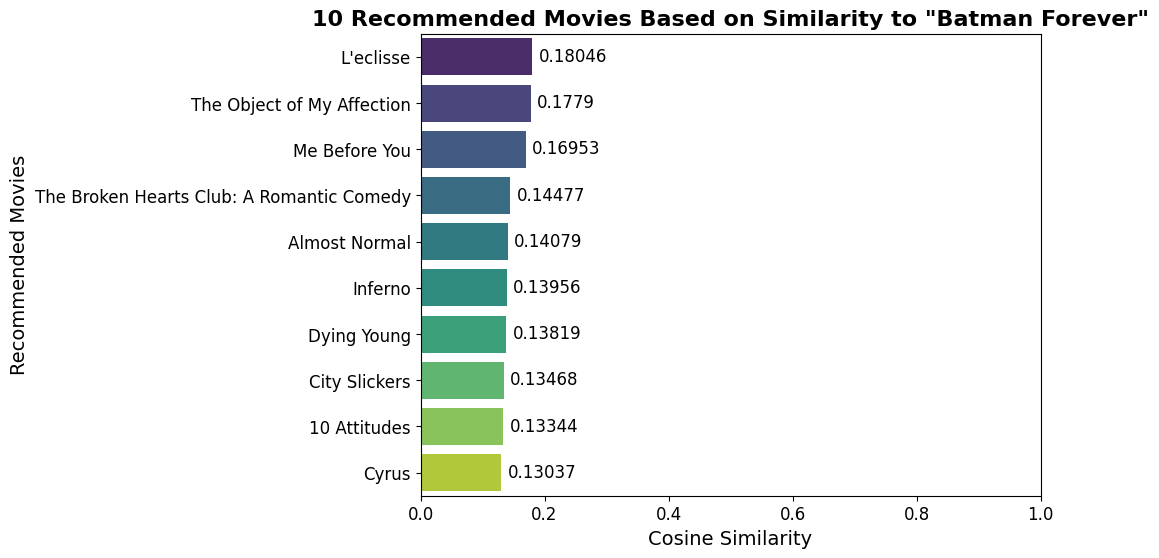

8561                                     L'eclisse
1717                    The Object of My Affection
36223                                Me Before You
3790     The Broken Hearts Club: A Romantic Comedy
32388                                Almost Normal
3465                                       Inferno
3316                                   Dying Young
4193                                 City Slickers
32385                                 10 Attitudes
15131                                        Cyrus
Name: title, dtype: object


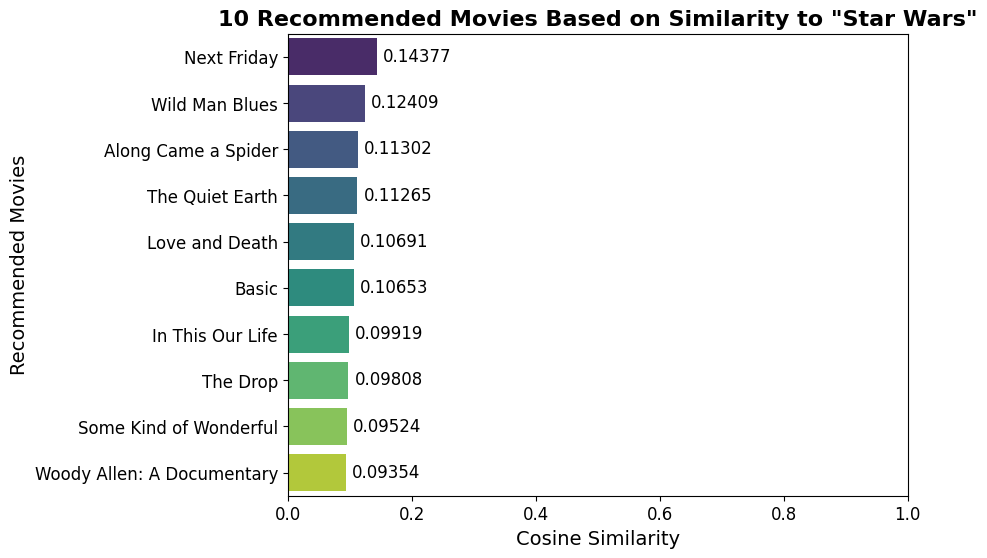

3060                    Next Friday
1757                 Wild Man Blues
4111            Along Came a Spider
8875                The Quiet Earth
3692                 Love and Death
6125                          Basic
7341               In This Our Life
24089                      The Drop
1245         Some Kind of Wonderful
21190    Woody Allen: A Documentary
Name: title, dtype: object


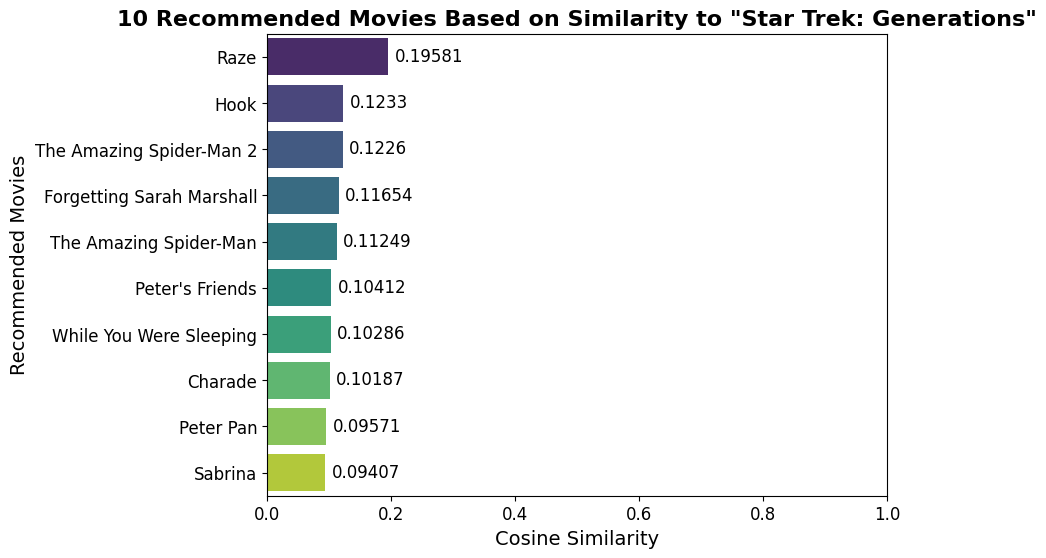

23515                         Raze
3368                          Hook
23187     The Amazing Spider-Man 2
12540    Forgetting Sarah Marshall
19129       The Amazing Spider-Man
2928               Peter's Friends
334        While You Were Sleeping
884                        Charade
14756                    Peter Pan
888                        Sabrina
Name: title, dtype: object


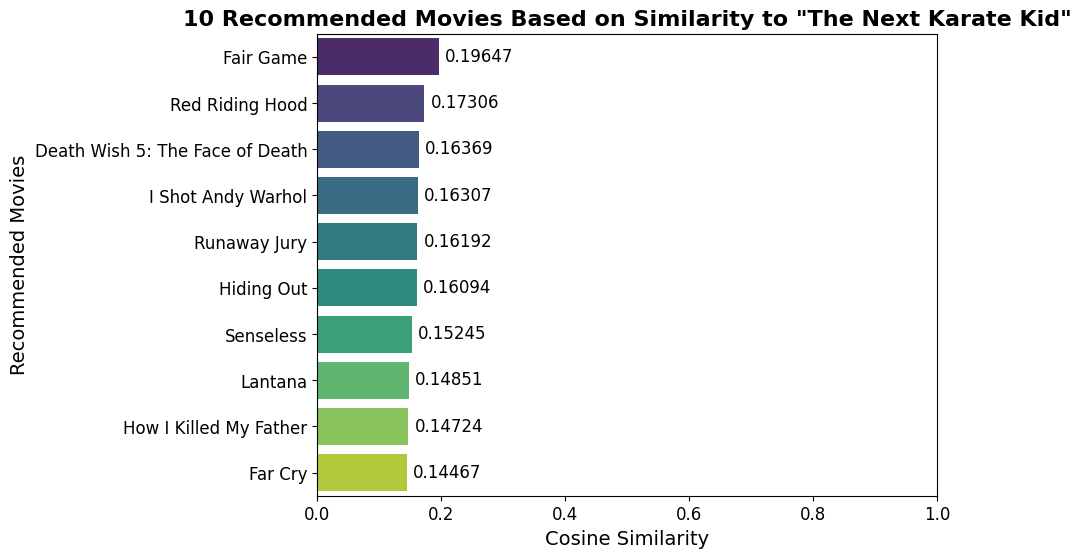

16077                          Fair Game
16827                    Red Riding Hood
3314     Death Wish 5: The Face of Death
748                   I Shot Andy Warhol
6730                        Runaway Jury
3989                          Hiding Out
1659                           Senseless
4848                             Lantana
5401              How I Killed My Father
13462                            Far Cry
Name: title, dtype: object


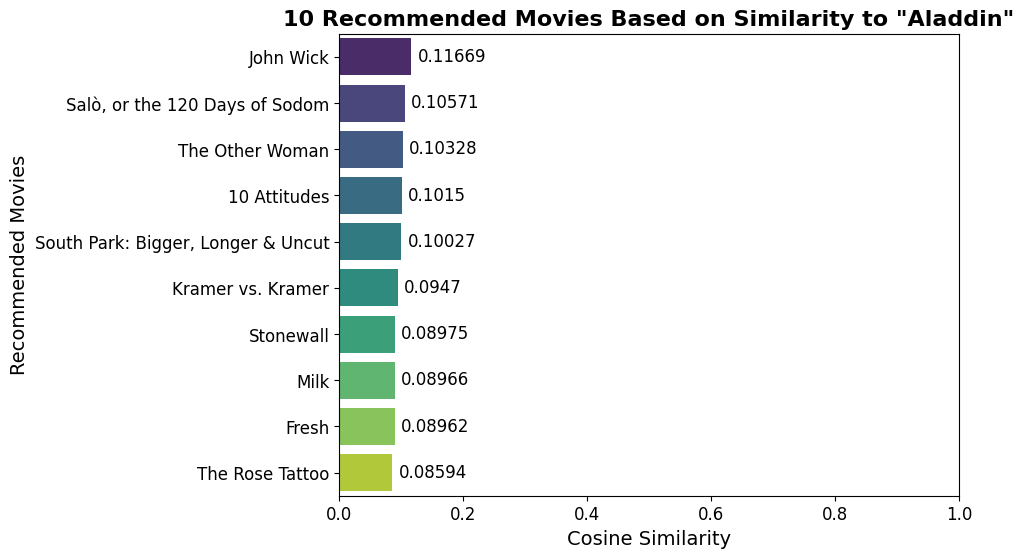

24351                             John Wick
6872         Salò, or the 120 Days of Sodom
23245                       The Other Woman
32385                          10 Attitudes
2585     South Park: Bigger, Longer & Uncut
1846                      Kramer vs. Kramer
807                               Stonewall
13131                                  Milk
451                                   Fresh
8194                        The Rose Tattoo
Name: title, dtype: object


In [10]:
list_of_movies = ["Batman Forever", "Star Wars", "Star Trek: Generations", "The Next Karate Kid", "Aladdin"]
for movie in list_of_movies:
    recommendations = recommend_movies(movie, cosine_sim=cosine_sim, num_recommendations=10)
    print(recommendations)


- We apply content-based filtering to the movies dataset based on director, cast, keywords, and genres of the movie.

In [11]:
credits_df = pd.read_csv("movielen/credits.csv")
keywords_df = pd.read_csv("movielen/keywords.csv")
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [12]:
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [13]:
# Build recommendation system based on credits and keywords
movies_df = pd.merge(movies_df, credits_df, on='id')  # Merge credits data with movies data
movies_df = pd.merge(movies_df, keywords_df, on='id')  # Merge keywords data with movies data

# Check the columns of movies_df
print(movies_df.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')


In [14]:
import ast  # Import the ast module for string-to-list conversion

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
  movies_df[feature] = movies_df[feature].apply(ast.literal_eval)

In [15]:
movies_df[features].head()

,cast,crew,keywords,genres
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'id': 35, 'name': 'Comedy'}]"


In [16]:
movies_df['cast'][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [17]:
# Get director's name from crew data in 'crew' column and put it in 'director' column
movies_df['director'] = movies_df['crew'].apply(
    lambda x: next((cr['name'] for cr in x if cr['job']=='Director'), None)
)

# Check the column director of movies_df
print(movies_df['director'].head())

0      John Lasseter
1       Joe Johnston
2      Howard Deutch
3    Forest Whitaker
4      Charles Shyer
Name: director, dtype: object


In [18]:
# Define a function to extract names from a list of dictionaries 
def extract_names(column):
    return column.apply(lambda x: [item['name'] for item in x])

features = ['cast', 'keywords', 'genres']

for feature in features:
    # Extract names from 'cast', 'keywords', and 'genres' columns
    movies_df[feature] = extract_names(movies_df[feature])

In [19]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]"
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,"[baby, midlife crisis, confidence, aging, daug...",[Comedy]


In [20]:
# Define a function to clean the data
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [21]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [22]:
movies_df[features].head()

,cast,keywords,director,genres
0,"[tomhanks, timallen, donrickles, jimvarney, wa...","[jealousy, toy, boy, friendship, friends, riva...",johnlasseter,"[animation, comedy, family]"
1,"[robinwilliams, jonathanhyde, kirstendunst, br...","[boardgame, disappearance, basedonchildren'sbo...",joejohnston,"[adventure, fantasy, family]"
2,"[waltermatthau, jacklemmon, ann-margret, sophi...","[fishing, bestfriend, duringcreditsstinger, ol...",howarddeutch,"[romance, comedy]"
3,"[whitneyhouston, angelabassett, lorettadevine,...","[basedonnovel, interracialrelationship, single...",forestwhitaker,"[comedy, drama, romance]"
4,"[stevemartin, dianekeaton, martinshort, kimber...","[baby, midlifecrisis, confidence, aging, daugh...",charlesshyer,[comedy]


In [23]:
def create_mix_info(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres'])

movies_df['mix_info'] = movies_df.apply(create_mix_info, axis=1)

# Check the column mix_info of movies_df
print(movies_df['mix_info'].head())

0    jealousy toy boy friendship friends rivalry bo...
1    boardgame disappearance basedonchildren'sbook ...
2    fishing bestfriend duringcreditsstinger oldmen...
3    basedonnovel interracialrelationship singlemot...
4    baby midlifecrisis confidence aging daughter m...
Name: mix_info, dtype: object


In [24]:
# Apply CountVectorizer to mix_info column
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies_df['mix_info'])
print(count_matrix.shape)
print(count_vectorizer.get_feature_names_out())

(9219, 95454)
['11' '1500s' '15thcentury' ... '野島健児' '长泽雅美' '高桥一生']


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

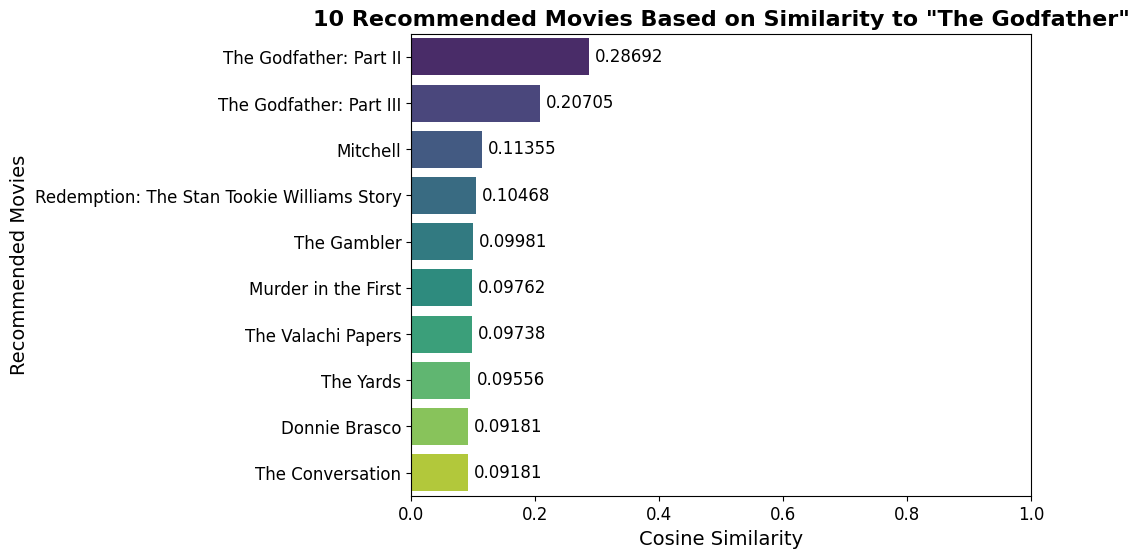

982                         The Godfather: Part II
1594                       The Godfather: Part III
5404                                      Mitchell
6001    Redemption: The Stan Tookie Williams Story
4128                                   The Gambler
252                            Murder in the First
5301                            The Valachi Papers
2226                                     The Yards
1192                                 Donnie Brasco
2990                              The Conversation
Name: title, dtype: object

In [26]:
recommend_movies('The Godfather', cosine_sim2, 10)

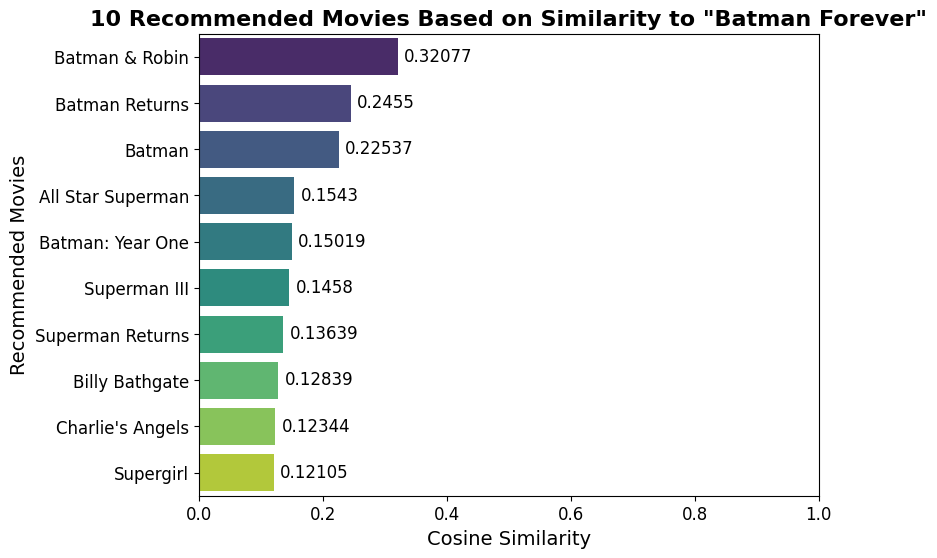

1252       Batman & Robin
1122       Batman Returns
524                Batman
7775    All Star Superman
7961     Batman: Year One
2125         Superman III
6489     Superman Returns
4289       Billy Bathgate
3190     Charlie's Angels
3107            Supergirl
Name: title, dtype: object


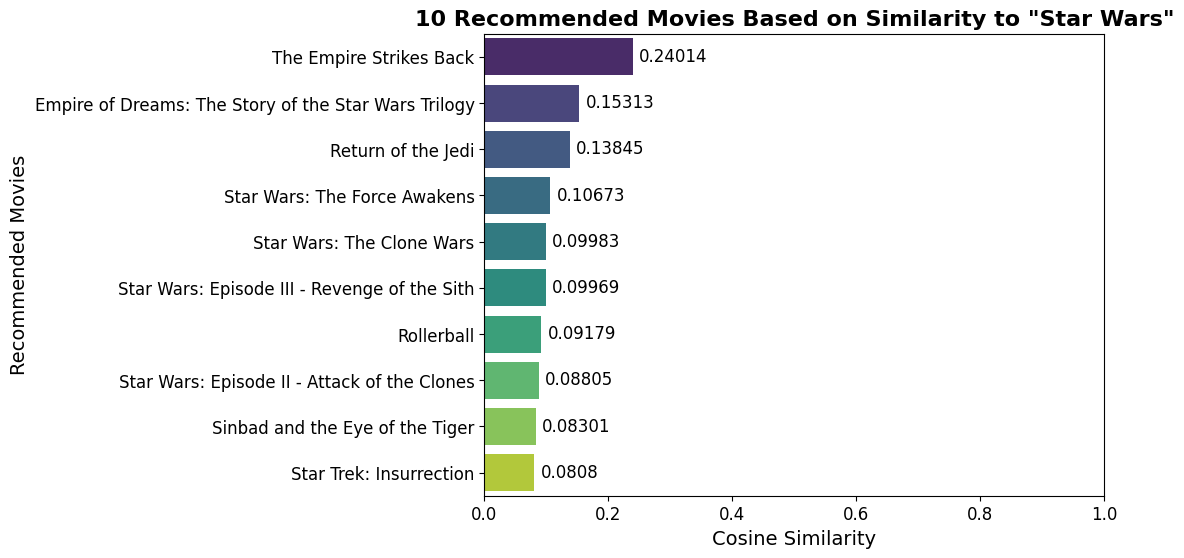

958                               The Empire Strikes Back
7603    Empire of Dreams: The Story of the Star Wars T...
971                                    Return of the Jedi
8833                         Star Wars: The Force Awakens
7052                            Star Wars: The Clone Wars
6167         Star Wars: Episode III - Revenge of the Sith
4194                                           Rollerball
4117         Star Wars: Episode II - Attack of the Clones
3052                      Sinbad and the Eye of the Tiger
1912                              Star Trek: Insurrection
Name: title, dtype: object


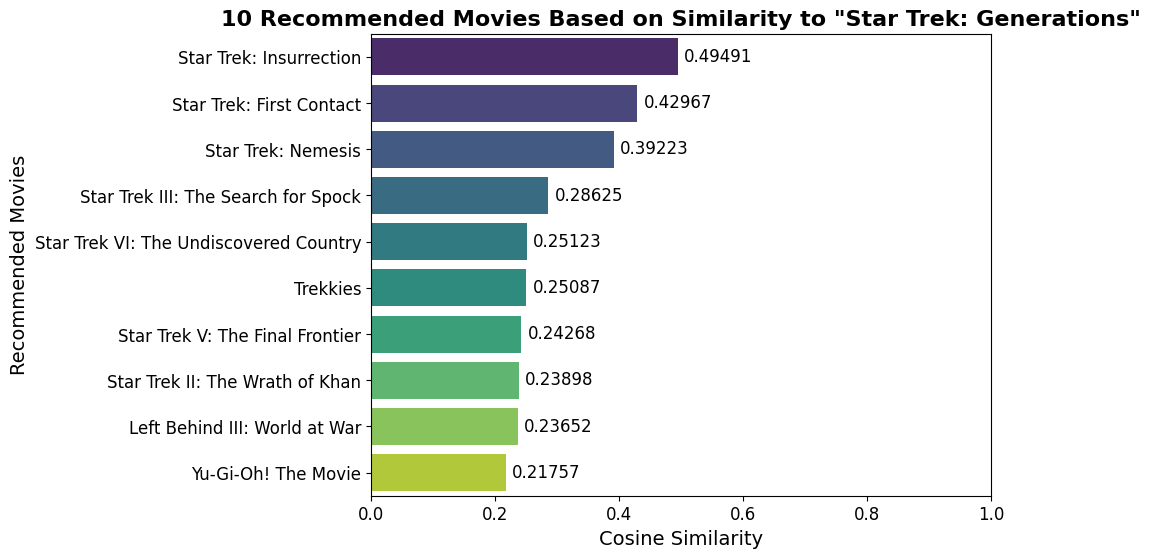

1912                   Star Trek: Insurrection
1105                  Star Trek: First Contact
4408                        Star Trek: Nemesis
1120       Star Trek III: The Search for Spock
1117    Star Trek VI: The Undiscovered Country
2164                                  Trekkies
1118           Star Trek V: The Final Frontier
1119           Star Trek II: The Wrath of Khan
6292             Left Behind III: World at War
5574                       Yu-Gi-Oh! The Movie
Name: title, dtype: object


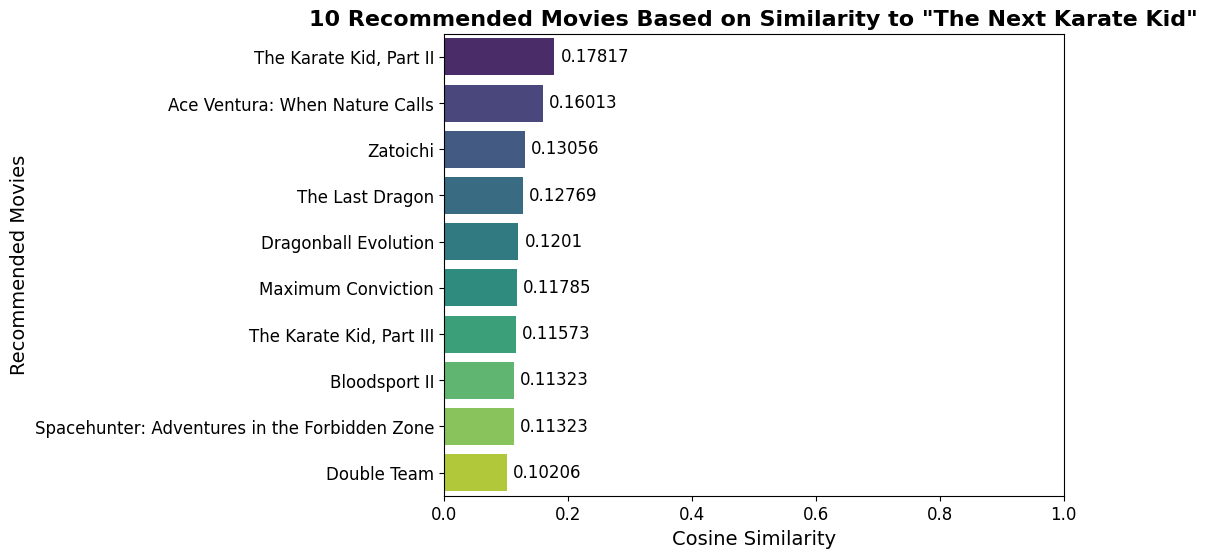

1940                          The Karate Kid, Part II
18                     Ace Ventura: When Nature Calls
5422                                         Zatoichi
3515                                  The Last Dragon
7229                             Dragonball Evolution
8275                               Maximum Conviction
1941                         The Karate Kid, Part III
572                                     Bloodsport II
3878    Spacehunter: Adventures in the Forbidden Zone
1211                                      Double Team
Name: title, dtype: object


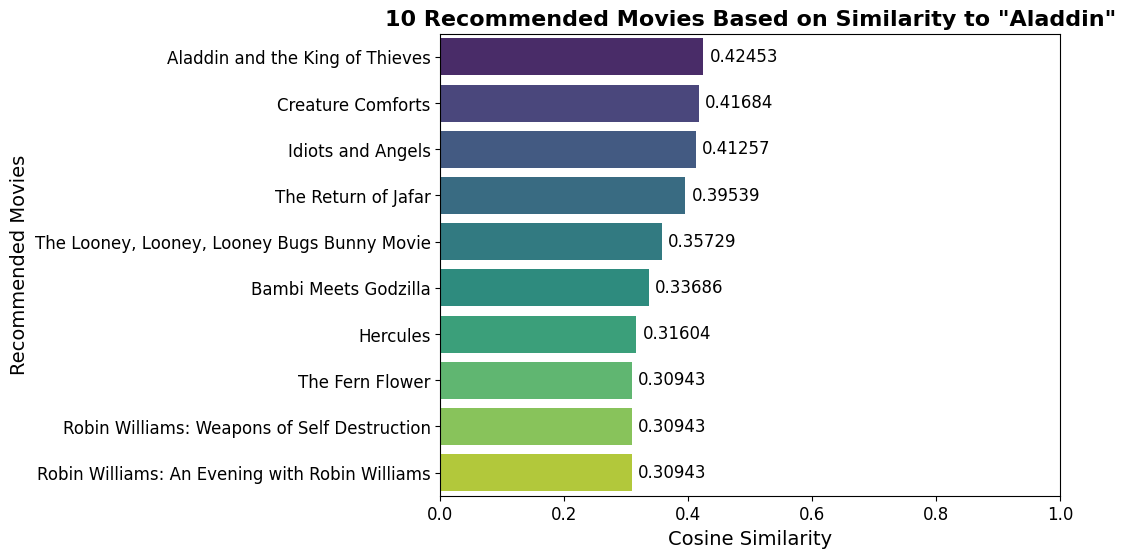

867                    Aladdin and the King of Thieves
2743                                 Creature Comforts
7835                                 Idiots and Angels
1661                               The Return of Jafar
4317       The Looney, Looney, Looney Bugs Bunny Movie
8711                              Bambi Meets Godzilla
1255                                          Hercules
7756                                   The Fern Flower
8823       Robin Williams: Weapons of Self Destruction
8884    Robin Williams: An Evening with Robin Williams
Name: title, dtype: object


In [27]:
for movie in list_of_movies:
    recommendations = recommend_movies(movie, cosine_sim=cosine_sim2, num_recommendations=10)
    print(recommendations)

# Collaborative Filtering

- Matrix Factorization Model

In [28]:
ratings_df = pd.read_csv('movielen/ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [29]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [30]:
reader = Reader()

In [31]:
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
svd = SVD()

In [32]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [33]:
ratings_df[ratings_df['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [34]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7279545664728255, details={'was_impossible': False})

In [35]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9001  0.8965  0.8882  0.8970  0.8962  0.8956  0.0040  
MAE (testset)     0.6929  0.6916  0.6832  0.6888  0.6899  0.6893  0.0033  
Fit time          0.62    0.59    0.53    0.53    0.59    0.57    0.04    
Test time         0.06    0.16    0.06    0.06    0.06    0.08    0.04    


{'test_rmse': array([0.90011308, 0.8964895 , 0.88819285, 0.89703428, 0.89619408]),
 'test_mae': array([0.69292828, 0.69156679, 0.68321117, 0.68883736, 0.68993641]),
 'fit_time': (0.6190528869628906,
  0.5879757404327393,
  0.5349738597869873,
  0.5296995639801025,
  0.5944743156433105),
 'test_time': (0.059946537017822266,
  0.16455292701721191,
  0.055998802185058594,
  0.05598282814025879,
  0.05813717842102051)}

# Content-based + Collaborative Filtering

In [36]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

id_map = pd.read_csv('movielen/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(movies_df[['title', 'id']], on='id').set_index('title')
indices_map = id_map.set_index('id')

In [37]:
id_map

,movieId,id
title,,
Toy Story,1,862.0
Jumanji,2,8844.0
Grumpier Old Men,3,15602.0
Waiting to Exhale,4,31357.0
Father of the Bride Part II,5,11862.0
...,...,...
The Last Brickmaker in America,161944,159550.0
Rustom,162542,392572.0
Mohenjo Daro,162672,402672.0


In [38]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    # content-based
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    # collaborative filtering
    movies = movies_df.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_date', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [39]:
hybrid(10, 'Jumanji')

,title,vote_count,vote_average,release_date,id,est
791,Cat on a Hot Tin Roof,168.0,7.6,1958-02-17,261,3.921604
8164,Pitch Perfect,2310.0,7.3,2012-09-28,114150,3.913499
5645,Vera Drake,80.0,6.8,2004-10-22,11109,3.831841
8608,Mondo Hollywood,1.0,3.0,1967-06-30,42697,3.795859
8154,Broken,86.0,6.5,2012-08-22,109584,3.745254
6557,The Bridge,81.0,7.0,2006-10-27,1666,3.744574
5356,Au Revoir les Enfants,137.0,7.5,1987-10-06,1786,3.739148
7308,The Imaginarium of Doctor Parnassus,885.0,6.3,2009-10-01,8054,3.728333
6392,The Call of Cthulhu,41.0,6.9,2005-01-01,20981,3.641289
3196,Diamonds Are Forever,562.0,6.3,1971-12-13,681,3.611891
